<a href="https://colab.research.google.com/github/OmarGard/Bedu-E2-Modulo5/blob/main/Postwork_3/Postwork_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Postwork 3: Clasificación No supervisada

In [20]:
# Cargamos bibliotecas a utilizar
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [30]:
# Cargamos dataset de las canciones de Spotify encontrado en Kaggle
df = pd.read_csv('https://raw.githubusercontent.com/OmarGard/Bedu-E2-Modulo5/main/Postwork_3/featuresdf.csv')
df.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,233713.0,4.0
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.813,88.931,228827.0,4.0
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.846,177.833,228200.0,4.0
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.446,103.019,247160.0,4.0
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.811,80.924,288600.0,4.0


In [32]:
# Eliminamos variables que no utilizaremos
df = df.drop(columns = ['id', 'mode', 'time_signature', 'instrumentalness'])
df.head()

,name,artists,danceability,energy,key,loudness,speechiness,acousticness,liveness,valence,tempo,duration_ms
0,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0802,0.5810,0.0931,0.931,95.977,233713.0
1,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,0.1200,0.2290,0.0924,0.813,88.931,228827.0
2,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,0.1700,0.2090,0.1120,0.846,177.833,228200.0
3,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0317,0.0498,0.1640,0.446,103.019,247160.0
4,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,0.0367,0.0552,0.1670,0.811,80.924,288600.0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          100 non-null    object 
 1   artists       100 non-null    object 
 2   danceability  100 non-null    float64
 3   energy        100 non-null    float64
 4   key           100 non-null    float64
 5   loudness      100 non-null    float64
 6   speechiness   100 non-null    float64
 7   acousticness  100 non-null    float64
 8   liveness      100 non-null    float64
 9   valence       100 non-null    float64
 10  tempo         100 non-null    float64
 11  duration_ms   100 non-null    float64
dtypes: float64(10), object(2)
memory usage: 9.5+ KB


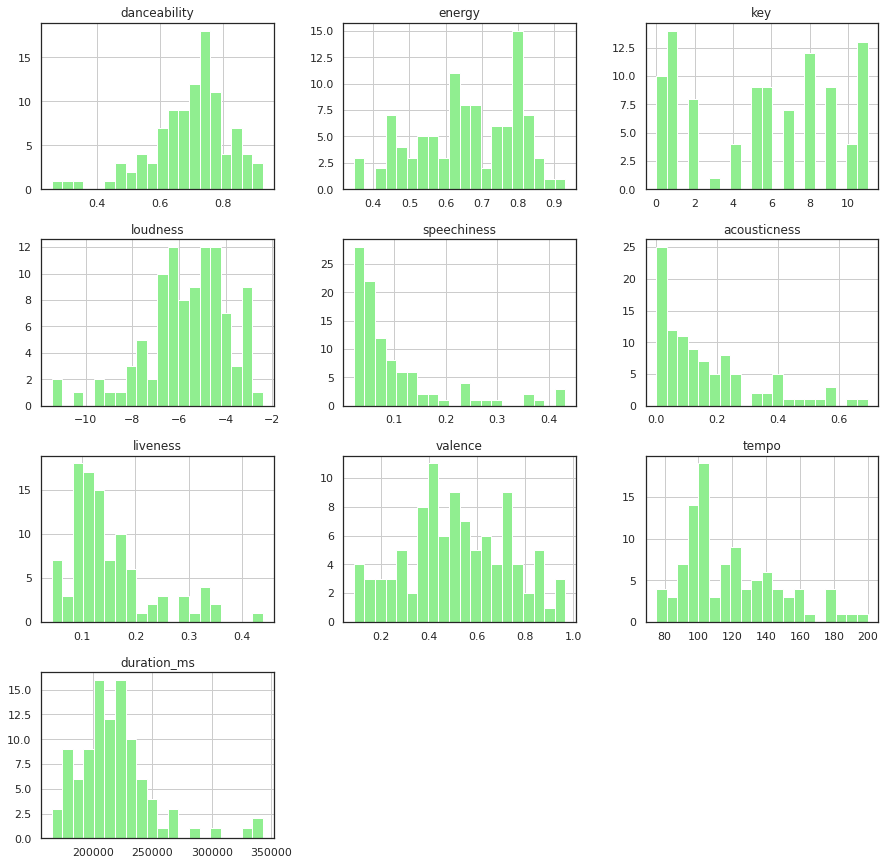

In [38]:
# Observemos la distribución de nuestros datos
data = df.drop(columns = ['name','artists'])
sns.set(style = "white", rc = {"figure.figsize":(15,15)});
data.hist(bins = 20, color = 'lightgreen');

Notemos que la mayoría de nuestras variables están sesgadas, no se distribuyen como una normal ni se encuetran en el mismo rango de datos, por lo cual procederemos a realizar una reparametrización.

In [39]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
data_cluster = data.copy()
data_cluster[data_cluster.columns] = std_scaler.fit_transform(data_cluster)

In [40]:
data_cluster

,danceability,energy,key,loudness,speechiness,acousticness,liveness,valence,tempo,duration_ms
0,1.029949,-0.062739,-1.230867,1.377358,-0.251157,2.499753,-0.731504,1.922214,-0.835063,0.468871
1,-0.022659,1.114076,-0.961531,0.738776,0.169393,0.377914,-0.740408,1.374272,-1.088400,0.319390
2,-0.295855,0.904704,-0.961531,0.499516,0.697721,0.257355,-0.491091,1.527510,2.108041,0.300208
3,-0.641368,-0.185475,1.462497,-0.622604,-0.763635,-0.702296,0.170362,-0.329922,-0.581871,0.880266
4,-0.705649,0.052776,0.385151,0.763315,-0.710803,-0.669745,0.208523,1.364984,-1.376289,2.148071
...,...,...,...,...,...,...,...,...,...,...
95,-0.175328,0.211610,-0.961531,0.497286,0.296192,0.263382,1.734955,-1.137904,0.669279,0.639584
96,-1.244006,1.431744,1.462497,0.000920,0.983019,-0.038015,-0.173085,-0.529595,1.459563,-0.316164
97,0.274642,-1.383949,-0.153522,-0.877479,-0.754126,1.788455,-0.605573,0.529140,-0.727703,-1.621478
98,-0.311926,-0.524802,0.115815,0.418648,-0.710803,-0.369553,-0.325728,-0.385645,-0.328175,-0.109687


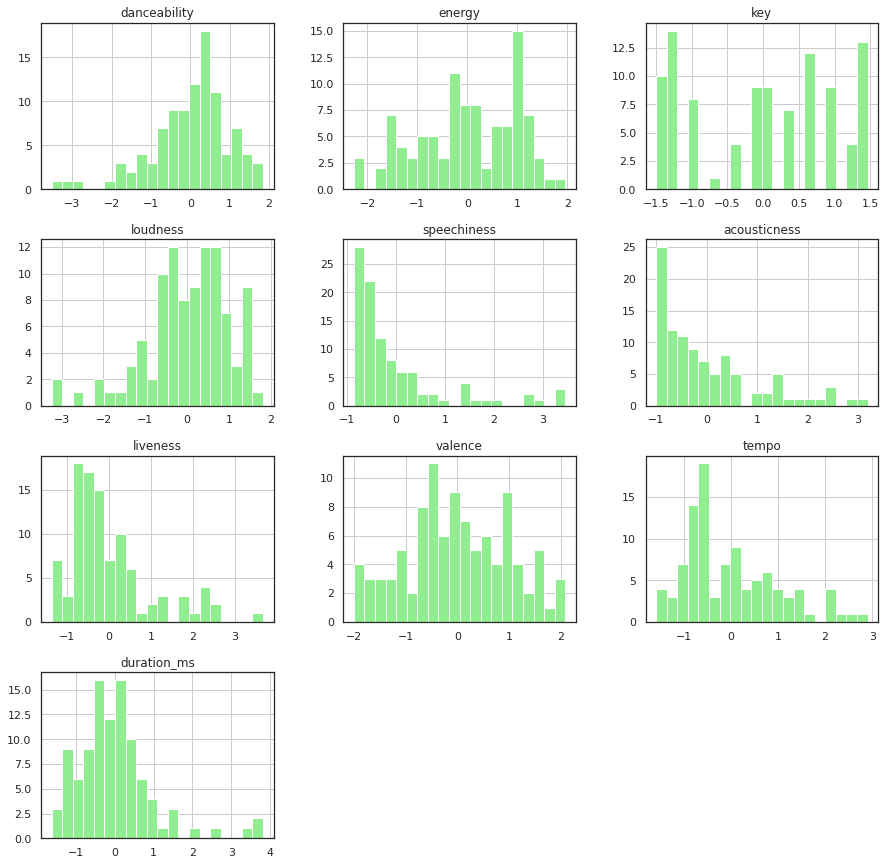

In [42]:
# Volvemos a graficar
sns.set(style = "white", rc = {"figure.figsize":(15,15)});
data_cluster.hist(bins = 20, color = 'lightgreen');

Notemos que todos nuestros datos ahora se enucnetran en el mismo rango , aunque aún hay un poco de sesgo, la reparametrización nos permitirá modelar más acertadamente.

In [43]:
# ANÁLISIS DE COMPONENTES PRINCIPALES
from sklearn.decomposition import PCA

# Queremos reducir a dos dimensiones
pca_2 = PCA(2)
pca_2_resultados = pca_2.fit_transform(data_cluster)

In [44]:
print("Varianza acumulada explicada por las nuevas variables: {:.2%}".format(np.sum(pca_2.explained_variance_ratio_)))

Varianza acumulada explicada por las nuevas variables: 40.36%


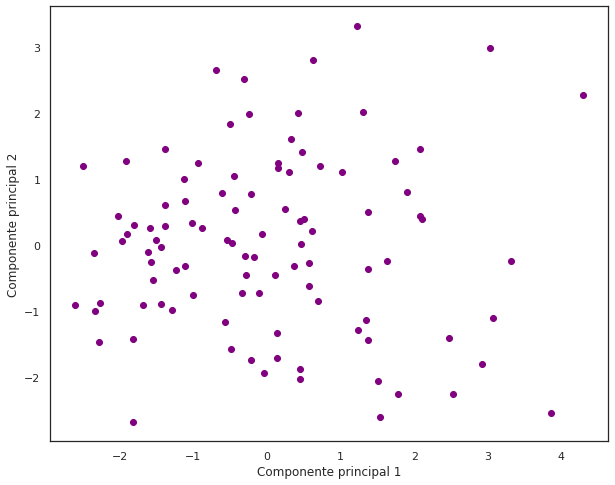

In [50]:
#Graficamos
plt.figure(figsize = (10,8))
sns.set(style = "white")
plt.scatter(x = pca_2_resultados[:,0], y = pca_2_resultados[:,1], color = 'purple')
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.show();

Una vez que hemos reducido a 2 dimensiones, porcedemos a realizar la clusterización, sin emabrgo para poder saber realemnte cuántos clusters debemos hacer, entonces aplicamos el método del codo y reforzamos esta evaluación con el método de la silueta.

In [51]:
# Clusterizacion
from sklearn.metrics import silhouette_score
import sklearn.cluster as cluster

inertia = []
for i in range(1,10):
  kmeans = cluster.KMeans(n_clusters = i, init = "k-means++", random_state = 18)
  kmeans.fit(data_cluster)
  inertia.append(kmeans.inertia_)

In [52]:
# Generación del método confirmatorio: método de la silueta
silueta = {}
for i in range(2,10):
  kmeans = cluster.KMeans(n_clusters = i, init = "k-means++", random_state = 18, n_init = 15, max_iter = 500)
  kmeans.fit(data_cluster)
  silueta[i] = silhouette_score(data_cluster, kmeans.labels_, metric = "euclidean")

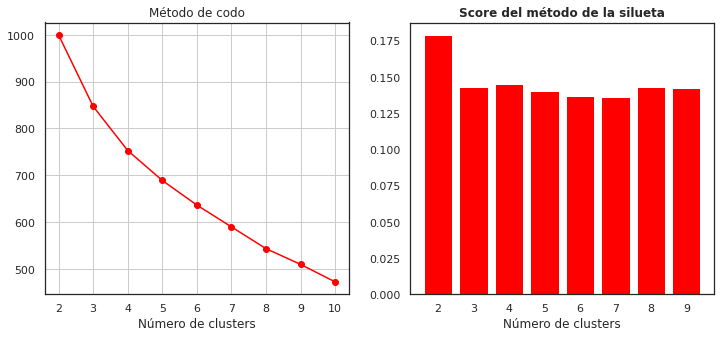

In [60]:
# Graficamos
sns.set(style = "white", rc = {"figure.figsize":(12,5)})

plt.subplot(1,2,1)
plt.plot(range(2,len(inertia) + 2), inertia, marker = "o", color = "red")
plt.xlabel("Número de clusters")
plt.title("Método de codo")
plt.grid(True)

plt.subplot(1,2,2)

plt.bar(range(len(silueta)), list(silueta.values()), align = "center", color = "red")
plt.xticks(range(len(silueta)), list(silueta.keys()))
plt.title("Score del método de la silueta", fontweight = "bold")
plt.xlabel("Número de clusters")

plt.show()

Notemos que el método de codo no era muy visible que realmente se necesitaran dos clusters, sin embargo podemos observar que el método de la silueta nos confirma que debemos realizar una clusterización con n = 2

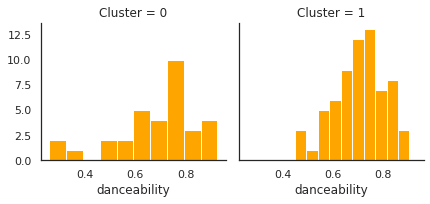

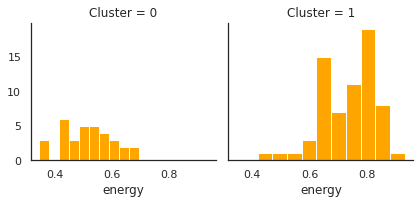

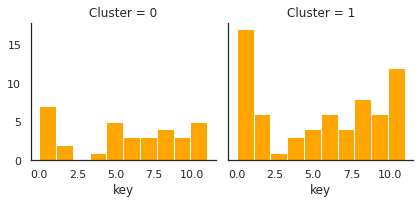

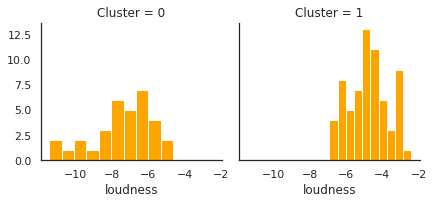

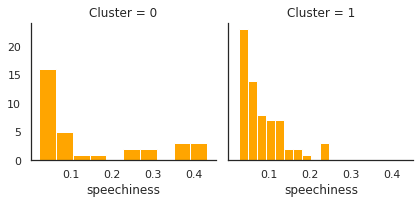

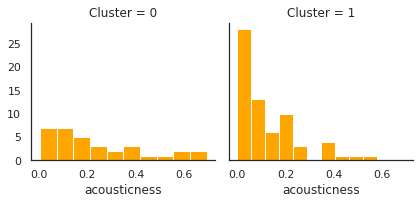

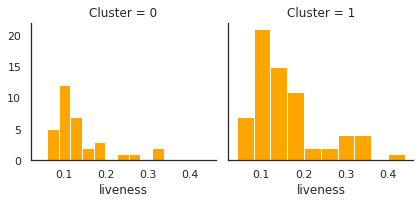

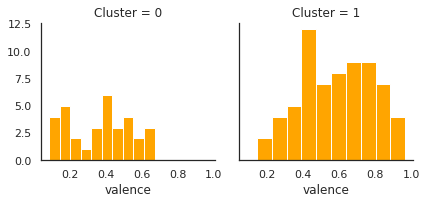

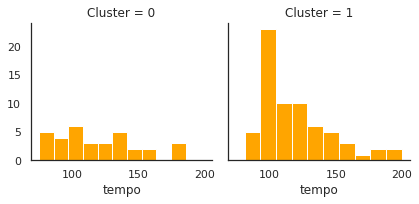

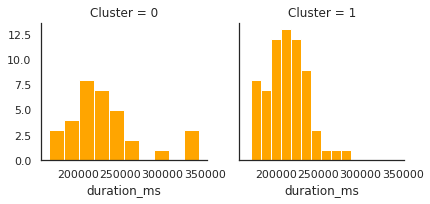

In [61]:
# Sabemos que son 2 clusters entonces
kmeans = cluster.KMeans(n_clusters = 2, random_state=84, init="k-means++")
kmeans_labels = kmeans.fit_predict(data_cluster)

centroids = kmeans.cluster_centers_
centroides_pca = pca_2.transform(centroids)

data2 = data.copy()
data2["Cluster"] = kmeans_labels

aux = data2.columns.tolist()
aux[0:len(aux)-1]

for cluster in aux[0:len(aux)-1]:
  grid = sns.FacetGrid(data2, col = "Cluster")
  grid.map(plt.hist, cluster, color = "orange")

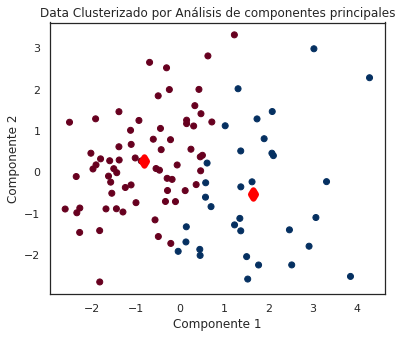

In [73]:
sns.set(style = "white", rc = {"figure.figsize": (6,5)})

plt.scatter(x = pca_2_resultados[:,0], y = pca_2_resultados[:,1], c = kmeans_labels, cmap = "RdBu_r")
plt.scatter(centroides_pca[:,0], centroides_pca[:,1], marker = "d",  color = "red", linewidths = 6, zorder = 10);
plt.title("Data Clusterizado por Análisis de componentes principales")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2");